In [1]:
# Data analysis libraries
import pandas as pd
import numpy as np

# Data visualization libraires
import seaborn as sns
import matplotlib.pyplot as plt

# show plot in the notebook
%matplotlib inline

# Next, we'll load the Iris flower dataset, which is in the "../input/" directory
iris = pd.read_csv("Iris.csv") # the iris dataset is now a Pandas DataFrame

In [2]:
# first five observations
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Number of observations and missing values. 
# There are 150 observations and no nan value
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [4]:
# Check basic description for features
iris.drop(['Id','Species'], axis=1).describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
# Check the response variable frequency
iris['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

**Explorary data analysis**

C:\Users\saisr\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


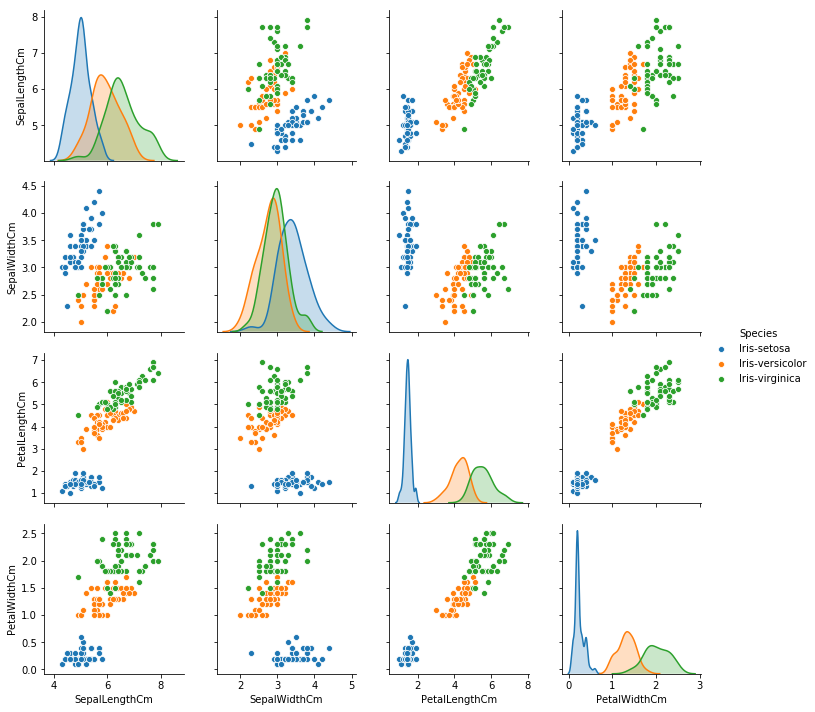

In [6]:
# Create a pairplot of the data set. Which flower species seems to be the most separable?
sns.pairplot(iris.drop(['Id'], axis=1),hue='Species')
# Iris setosa seems most separable from the other two species

C:\Users\saisr\Anaconda3\lib\site-packages\seaborn\distributions.py:679: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


Text(0, 0.5, 'Sepal Width Cm')

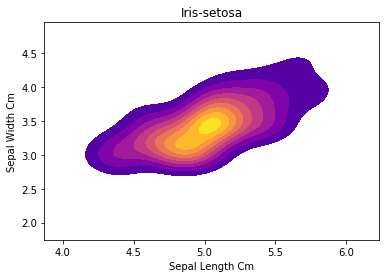

In [7]:
# Create a kde plot of sepal_length versus sepal width for setosa species of flower.
sub=iris[iris['Species']=='Iris-setosa']
sns.kdeplot(data=sub[['SepalLengthCm','SepalWidthCm']],cmap="plasma", shade=True, shade_lowest=False)
plt.title('Iris-setosa')
plt.xlabel('Sepal Length Cm')
plt.ylabel('Sepal Width Cm')

C:\Users\saisr\Anaconda3\lib\site-packages\seaborn\distributions.py:679: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


Text(0, 0.5, 'Petal Width Cm')

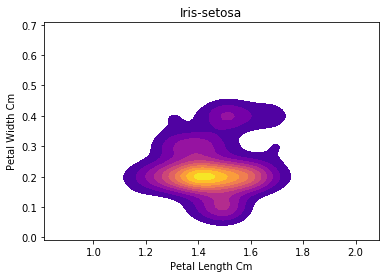

In [8]:
sns.kdeplot(data=sub[['PetalLengthCm','PetalWidthCm']],cmap="plasma", shade=True, shade_lowest=False)
plt.title('Iris-setosa')
plt.xlabel('Petal Length Cm')
plt.ylabel('Petal Width Cm')

Text(0.5, 1.0, 'Sepal Width versus Length for virginica species')

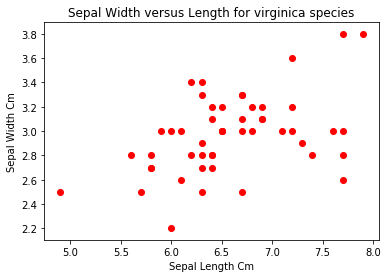

In [9]:
sub_virginica=iris[iris['Species']=='Iris-virginica']
# Create a scatter plot of the Sepal
plt.scatter(sub_virginica['SepalLengthCm'], sub_virginica['SepalWidthCm'], marker='o', color='r')
plt.xlabel('Sepal Length Cm')
plt.ylabel('Sepal Width Cm')
plt.title('Sepal Width versus Length for virginica species')

# Train test split

In [10]:
# Split data into a training set and a testing set.
# train_test_split shuffle the data before the split (shuffle=True by default)
from sklearn.model_selection import train_test_split
X=iris.drop(['Species', 'Id'], axis=1)
y=iris['Species']
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.5, shuffle=True,random_state=100)

**Train a Model**


In [11]:
# Now it's time to train a Support Vector Machine Classifier. 
# Call the SVC() model from sklearn and fit the model to the training data.
from sklearn.svm import SVC
model=SVC(C=1, kernel='rbf', tol=0.001)
model.fit(X_train, y_train)

C:\Users\saisr\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

**Model Evaluation**

In [12]:
# Now get predictions from the model and create a confusion matrix and a classification report.
pred=model.predict(X_test)
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))
print('\n')
print('Accuracy score is: ', accuracy_score(y_test, pred))

[[28  0  0]
 [ 0 17  0]
 [ 0  4 26]]


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        28
Iris-versicolor       0.81      1.00      0.89        17
 Iris-virginica       1.00      0.87      0.93        30

      micro avg       0.95      0.95      0.95        75
      macro avg       0.94      0.96      0.94        75
   weighted avg       0.96      0.95      0.95        75



Accuracy score is:  0.9466666666666667


**Gridsearch to tune hyperparameters**

In [13]:
iris.head(20)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [14]:
from sklearn.utils import shuffle
X=iris.drop('Species', axis=1)
y=iris['Species']
print('Before shuffle: ',y[0:20])
X,y = shuffle(X,y, random_state=0)
print("After shuffle: ", y[0:20])

Before shuffle:  0     Iris-setosa
1     Iris-setosa
2     Iris-setosa
3     Iris-setosa
4     Iris-setosa
5     Iris-setosa
6     Iris-setosa
7     Iris-setosa
8     Iris-setosa
9     Iris-setosa
10    Iris-setosa
11    Iris-setosa
12    Iris-setosa
13    Iris-setosa
14    Iris-setosa
15    Iris-setosa
16    Iris-setosa
17    Iris-setosa
18    Iris-setosa
19    Iris-setosa
Name: Species, dtype: object
After shuffle:  114     Iris-virginica
62     Iris-versicolor
33         Iris-setosa
107     Iris-virginica
7          Iris-setosa
100     Iris-virginica
40         Iris-setosa
86     Iris-versicolor
76     Iris-versicolor
71     Iris-versicolor
134     Iris-virginica
51     Iris-versicolor
73     Iris-versicolor
54     Iris-versicolor
63     Iris-versicolor
37         Iris-setosa
78     Iris-versicolor
90     Iris-versicolor
45         Iris-setosa
16         Iris-setosa
Name: Species, dtype: object


In [15]:
# Create a dictionary called param_grid and fill out some parameters for C and gamma.
param_grid = {'C': [0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}
# param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': ['auto'], 'kernel': ['rbf']}
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(estimator=SVC(), param_grid=param_grid, scoring='accuracy',cv=3, verbose=1, refit=True )
grid.fit(X, y)

Fitting 3 folds for each of 45 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:    3.6s finished
C:\Users\saisr\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

In [16]:
# The best hyperparameters chosen is
print(grid.best_params_)
print(grid.best_estimator_)
print('Mean cross-validated score of the best_estimator: ', grid.best_score_)
print('The number of cross-validation splits (folds/iterations): ', grid.n_splits_)

{'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Mean cross-validated score of the best_estimator:  1.0
The number of cross-validation splits (folds/iterations):  3


In [17]:
# Another optition for shuffle is to use cv=KFold, we get 98% accuracy
from sklearn.model_selection import KFold
X=iris.drop(['Species', 'Id'], axis=1)
y=iris['Species']
# Create a dictionary called param_grid and fill out some parameters for C and gamma.
param_grid = {'C': [0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}
# param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': ['auto'], 'kernel': ['rbf']}
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(estimator=SVC(), param_grid=param_grid, scoring='accuracy',
                  cv=KFold(n_splits=3, shuffle=True, random_state=0), verbose=1, refit=True )
grid.fit(X, y)

# The best hyperparameters chosen is
print(grid.best_params_)
print(grid.best_estimator_)
print('Mean cross-validated score of the best_estimator: ', grid.best_score_)
print('The number of cross-validation splits (folds/iterations): ', grid.n_splits_)

Fitting 3 folds for each of 45 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'C': 50, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=50, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Mean cross-validated score of the best_estimator:  0.98
The number of cross-validation splits (folds/iterations):  3


[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:    6.6s finished
